<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Algoritmo de Deutsch-Joza

In [1]:
# initialisation
import numpy as np
import math, cmath

# Importing standard Qiskit libraries
from qiskit.providers.aer import Aer, AerSimulator
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.providers.ibmq import least_busy, IBMQBackend
from qiskit.tools.jupyter import *

# basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import array_to_latex

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()


/tmp/ipykernel_2388/747038211.py:18: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


# ORACULOS

Podemos crear una __funcion de oráculo__ para n qubits que sea balanceada o constante:

- balanceada: con una funcion de paridad o suma binaria
- constante: que devuelva siempre 0 o siempre 1

## Oráculo con funcion balanceada

#### EJERCICIO

Construye un circuito con n qubits de entrada y 1 qubit de salida, que compute la salida como una suma binaria o funcion de paridad.

Ejecuta el circuito y construye el histograma de resultados

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


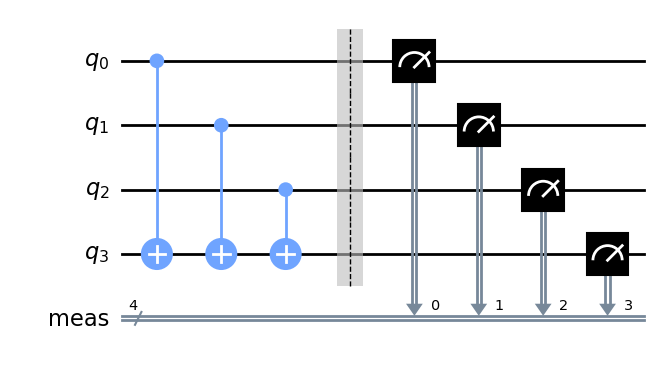

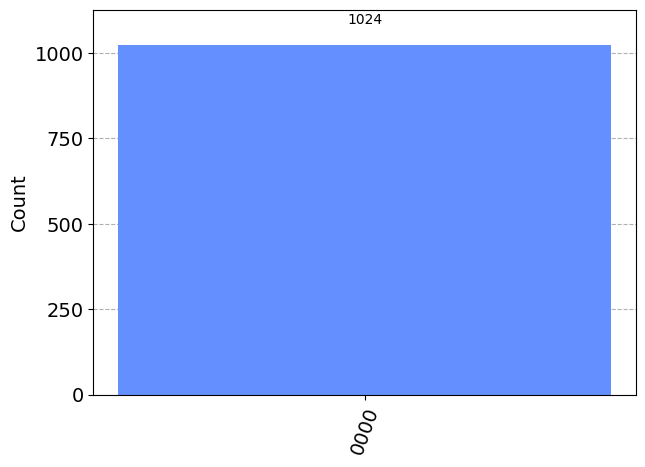

In [2]:
#BALANCEADA
#construimos un circuito de n+1 qubits con n bits de entrada y uno de salida que calcule la funcion paridad o suma binaria

n=3 #por ejemplo
#creamos el circuito
circuito = QuantumCircuit(n+1)

for ind in range(n):
    circuito.cx(ind,n)

#ponemos las puertas de medida
circuito.measure_all()

#lo dibujamos
display(circuito.draw("mpl"))

#Medimos que resultados da este circuito funcion
backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=circuito,backend=backend)
job = backend.run(transpiled_circ).result()
plot_histogram(job.get_counts())

Si ponemos los n __qubits del input__ en superposicion vemos como es la funcion binaria balanceada. Estamos ejecutando todas los valores de input posibles a la vez.

#### EJERCICIO

Pon todos los n qubits de la entrada en superposicion y calcula la salida del ciruito.

Para ello ejecuta el circuito, obten el histograma y muestra el resultado de las medidas obtendas con el siguiente formato:

```
INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 106 ----- 0.103515625
001 ------ 1 ----- 136 ----- 0.1328125
010 ------ 1 ----- 135 ----- 0.1318359375
011 ------ 0 ----- 141 ----- 0.1376953125
100 ------ 1 ----- 104 ----- 0.1015625
101 ------ 0 ----- 125 ----- 0.1220703125
110 ------ 0 ----- 135 ----- 0.1318359375
111 ------ 1 ----- 142 ----- 0.138671875
shots totales 1024
```



/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


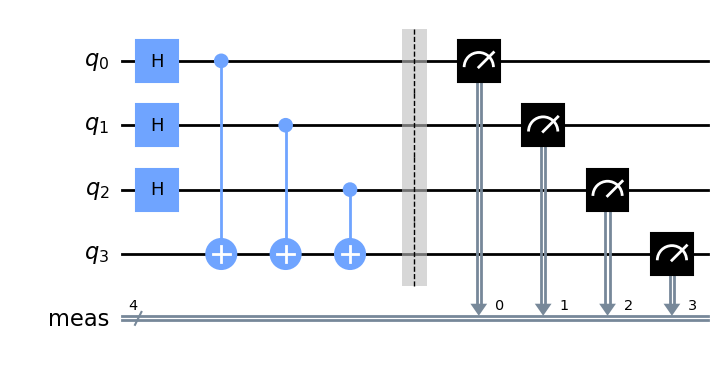

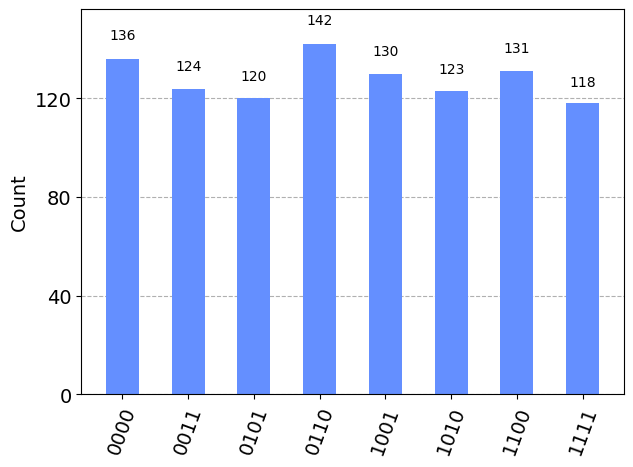

In [3]:
n=3
#creamos el circuito
circuito = QuantumCircuit(n+1)
for ind in range(n):
    circuito.h(ind)
for ind in range(n):
    circuito.cx(ind,n)

#ejecucion todas las entradas posibles de input en paralelo


#ponemos las puertas de medida
circuito.measure_all()

#lo dibujamos
display(circuito.draw("mpl"))


#Medimos que resultados da este circuito funcion
backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=circuito,backend=backend)
job = backend.run(transpiled_circ).result()
plot_histogram(job.get_counts())


Veamoslo como valores de entrada y salida digitales

In [4]:
#representacion de la salida en el formato especificado
counts = job.get_counts()

print("INPUT------OUTPUT-----count----percent")
for ind in counts.items():
    print(f"{ind[0][1:]} ------ {ind[0][0]} ------ {ind[1]} ------ {ind[1]/1024}")

INPUT------OUTPUT-----count----percent
110 ------ 0 ------ 142 ------ 0.138671875
111 ------ 1 ------ 118 ------ 0.115234375
101 ------ 0 ------ 120 ------ 0.1171875
010 ------ 1 ------ 123 ------ 0.1201171875
011 ------ 0 ------ 124 ------ 0.12109375
001 ------ 1 ------ 130 ------ 0.126953125
100 ------ 1 ------ 131 ------ 0.1279296875
000 ------ 0 ------ 136 ------ 0.1328125


## Oraculo con funcion constante

Creamos una funcion binaria constante. Vamos a seleccionar aleatoriamente si queremos que la salida sea siempre 0 o siempre 1

#### EJERCICIO

Construye un circuito con n qubits de entrada y 1 qubit de salida, que compute la salida constante como 0 ó 1.

Calcula un numero aleatorio y en funcion de este numero, decide si la salida será 0 ó 1

Ejecuta el circuito poniendo todos los qubits de entrada en superposicion, obten el histograma y muestra el resultado de las medidas obtendas con el siguiente formato:

```
INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 106 ----- 0.103515625
001 ------ 0 ----- 136 ----- 0.1328125
010 ------ 0 ----- 135 ----- 0.1318359375
011 ------ 0 ----- 141 ----- 0.1376953125
100 ------ 0 ----- 104 ----- 0.1015625
101 ------ 0 ----- 125 ----- 0.1220703125
110 ------ 0 ----- 135 ----- 0.1318359375
111 ------ 0 ----- 142 ----- 0.138671875
shots totales 1024
```

Funcion constante de valor 1


/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


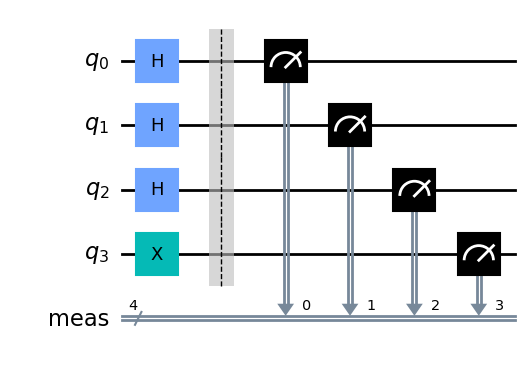

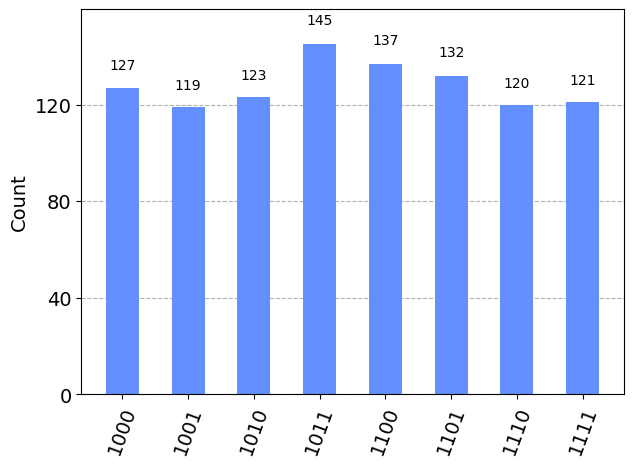

INPUT------OUTPUT-----count----percent
011 ------ 1 ------ 145 ------ 0.1416015625
110 ------ 1 ------ 120 ------ 0.1171875
111 ------ 1 ------ 121 ------ 0.1181640625
101 ------ 1 ------ 132 ------ 0.12890625
010 ------ 1 ------ 123 ------ 0.1201171875
100 ------ 1 ------ 137 ------ 0.1337890625
001 ------ 1 ------ 119 ------ 0.1162109375
000 ------ 1 ------ 127 ------ 0.1240234375


In [6]:
n=3
#creamos el circuito
circuito = QuantumCircuit(n+1)

#ejecucion todas las entradas posibles de input en paralelo
circuito.h(range(n))

#codificamos todo 1's o todo 0's a la salida de forma aleatoria
cnst = np.random.randint(2)

if cnst==1:
    circuito.x(n)
    print("Funcion constante de valor 1")
else: 
    print("Funcion constante de valor 0")

#ponemos las puertas de medida
circuito.measure_all()

#lo dibujamos
display(circuito.draw("mpl"))

#Medimos que resultados da este circuito funcion
backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=circuito,backend=backend)
job = backend.run(transpiled_circ).result()

#mostramos histograma resultado
display(plot_histogram(job.get_counts()))

#mostramos la ejecucion de la funcion en binario
counts = job.get_counts()

print("INPUT------OUTPUT-----count----percent")
for ind in counts.items():
    print(f"{ind[0][1:]} ------ {ind[0][0]} ------ {ind[1]} ------ {ind[1]/1024}")


## Oraculo con funcion aleatoria

Con todo el codigo anterior definimos una funcion que de forma aleatoria va a decidir como crea el oraculo, si balanceado o constante (con 0's o 1's)

### EJERCICIO

Crea una funcion una funcion de oráculo que devuelva un circuito que computa una funcion constante o balanceada de forma aleatoria

In [7]:
def dj_oracle(n):
    #La funcion crea un objeto de QuantumCircuit y lo devuelve
    #El circuito del oraculo tiene n qubit de entrada y uno de salida -> en total n+1 qubits

    oracle_qc = QuantumCircuit(n+1)

    #sorteamos el tipo de funcion del oraculo 0=constante y 1=balanceada
    cnst = np.random.randint(2)

    if cnst==0:
        #Caso de un oraculo constante
        ran = np.random.randint(2)
        if ran==1:
            print("Funcion constante de valor 1")
            oracle_qc.x(n)
        else:
            print("Funcion constante de valor 0")
    else:
        #Caso de un oraculo balanceado
        print("Funcion balanceada")
        for ind in range(n):
            oracle_qc.cx(ind,n)

    oracle_qc.name = 'DJ-Oracle' 
    return oracle_qc

Lo ejecutamos en superposicion para ver la salida de la funcion del oráculo

Funcion balanceada


/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


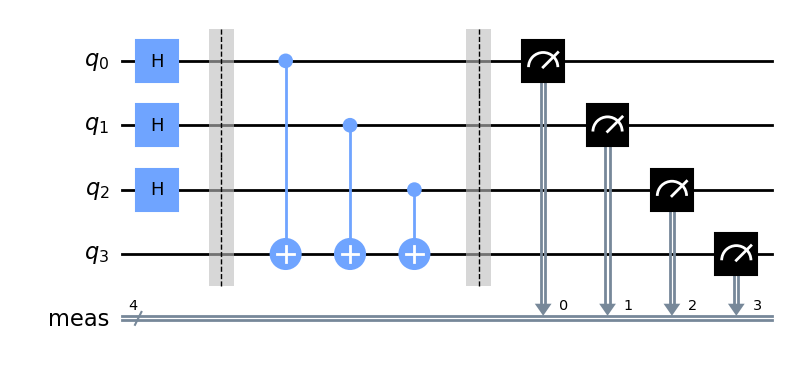

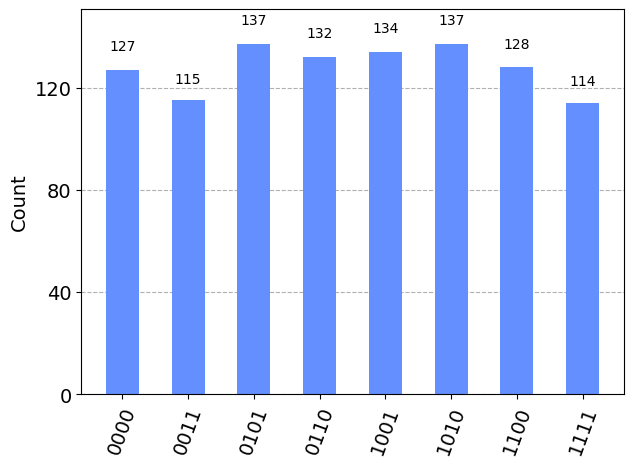

INPUT------OUTPUT-----count----percent
100 ------ 1 ------ 128 ------ 0.125
001 ------ 1 ------ 134 ------ 0.130859375
000 ------ 0 ------ 127 ------ 0.1240234375
101 ------ 0 ------ 137 ------ 0.1337890625
010 ------ 1 ------ 137 ------ 0.1337890625
011 ------ 0 ------ 115 ------ 0.1123046875
110 ------ 0 ------ 132 ------ 0.12890625
111 ------ 1 ------ 114 ------ 0.111328125


In [10]:
#Creamos un circuito de n qubits+1
n=3
circuit = QuantumCircuit(n+1)

#ponemos los qubits de entrada en superposicion
circuit.h(range(n))
circuit.barrier()

# Le añadimos el oráculo con funcion aleatoria  -> Utilizar el metodo.compose de la clase QuantumCircuit
circuit.compose(dj_oracle(n),inplace=True)

#ponemos las puertas de medida
circuit.measure_all()

#Mostramos el circuito
display(circuit.draw("mpl"))

#lo ejecutamos
backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=circuit,backend=backend)
job = backend.run(transpiled_circ).result()

#mostramos histograma resultado
display(plot_histogram(job.get_counts()))

#mostramos la ejecucion de la funcion en binario
counts = job.get_counts()

print("INPUT------OUTPUT-----count----percent")
for ind in counts.items():
    print(f"{ind[0][1:]} ------ {ind[0][0]} ------ {ind[1]} ------ {ind[1]/1024}")

# Ejecucion del Algoritmo de Deusch-Jozsa

## Ejecucion Paso a Paso en el simulador

Vamos a hacer una ejecucion paso a paso viendo el vector de estados. Para ello vamos definir una funcion que nos ayudará a visualizar el vector de estados paso a paso

### EJERCICIO

Construye una funcion que tome como entrada un ciruito cuantico, lo ejecute, obtenga el vector de estados resultado y muestre por pantalla su valor en formato latex, las probabilidades y las fases de cada componente del vector

In [19]:
def get_phases(svector):
    return np.array([math.degrees(cmath.polar(c)[1]) for c in svector.data])

In [20]:
def svector_viz(qc,ind):
    #tomamos un circuito sin medidas
    #medimos el estado, hay que salvar el vector de estados del circuito (en lugar de poner puertas de medida)
    qc.save_statevector(f"Phi_{ind}")
    
    #ejecutamos en el simulador
    simulador = Aer.get_backend("aer_simulator")
    result = simulador.run(qc).result()
    # result.get_statevector() # Para el vector de estados
    data = result.data(0)

    #obtenemos el vector de estados resultado
    stv = data[f"Phi_{ind}"]
    print("Statevector: ",stv)
    
    #imprimimos el vector en latex
    display(stv.draw("latex"))
    
    #imprimimos las probabilidades de cada estado de la base
    display(stv.probabilities_dict())
    
    #imprimimos las fases de cada estado de la base
    display(get_phases(stv))
    
    #visualizamos el plot_bloch_multivector
    display(plot_bloch_multivector(stv))


Statevector:  Statevector([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

{'000': 0.5000000000000001, '010': 0.4999999999999999}

array([0., 0., 0., 0., 0., 0., 0., 0.])

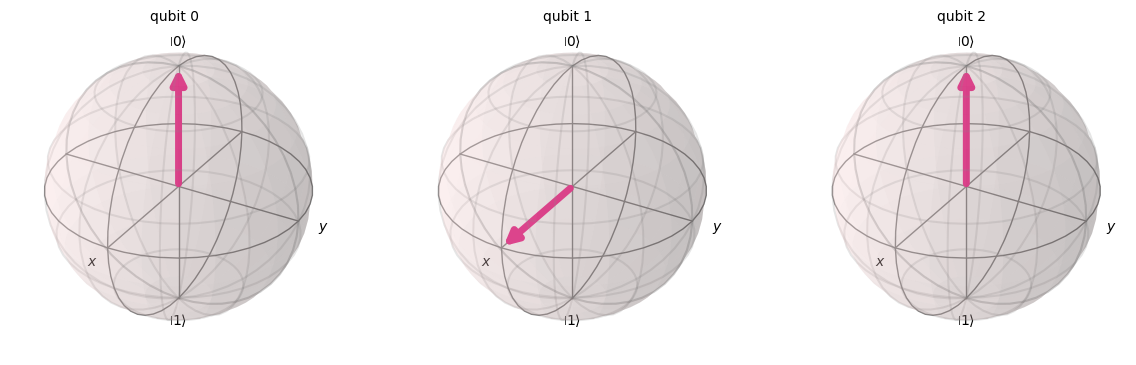

In [21]:
circ = QuantumCircuit(3)
circ.h(1)

svector_viz(circ,0)

Ejecutamos paso a paso el algoritmo, que no es más que poner en superposicion los estados de los qubits del registro de entrada y de salida:

- en el registro de entrada, todos los qubits deben de estar en el estado |+>
- en el registro de salida el qubit debe de estar en el estado |->

El oraculo es aleatorio y el algoritmo nos dira en una sola ejecucion si la funcion es constante cuando el registro de entrada quede en estado |00...0>. En caso contrario la funcion es balanceada

Statevector:  Statevector([ 0.25-3.061617e-17j,  0.25-3.061617e-17j,  0.25-3.061617e-17j,
              0.25-3.061617e-17j,  0.25-3.061617e-17j,  0.25-3.061617e-17j,
              0.25-3.061617e-17j,  0.25-3.061617e-17j, -0.25+3.061617e-17j,
             -0.25+3.061617e-17j, -0.25+3.061617e-17j, -0.25+3.061617e-17j,
             -0.25+3.061617e-17j, -0.25+3.061617e-17j, -0.25+3.061617e-17j,
             -0.25+3.061617e-17j],
            dims=(2, 2, 2, 2))


<IPython.core.display.Latex object>

{'0000': 0.06250000000000003,
 '0001': 0.0625,
 '0010': 0.0625,
 '0011': 0.06249999999999997,
 '0100': 0.0625,
 '0101': 0.06249999999999997,
 '0110': 0.06249999999999997,
 '0111': 0.06249999999999996,
 '1000': 0.06250000000000003,
 '1001': 0.06250000000000003,
 '1010': 0.06250000000000003,
 '1011': 0.0625,
 '1100': 0.06250000000000003,
 '1101': 0.0625,
 '1110': 0.0625,
 '1111': 0.06249999999999997}

array([-7.0167093e-15, -7.0167093e-15, -7.0167093e-15, -7.0167093e-15,
       -7.0167093e-15, -7.0167093e-15, -7.0167093e-15, -7.0167093e-15,
        1.8000000e+02,  1.8000000e+02,  1.8000000e+02,  1.8000000e+02,
        1.8000000e+02,  1.8000000e+02,  1.8000000e+02,  1.8000000e+02])

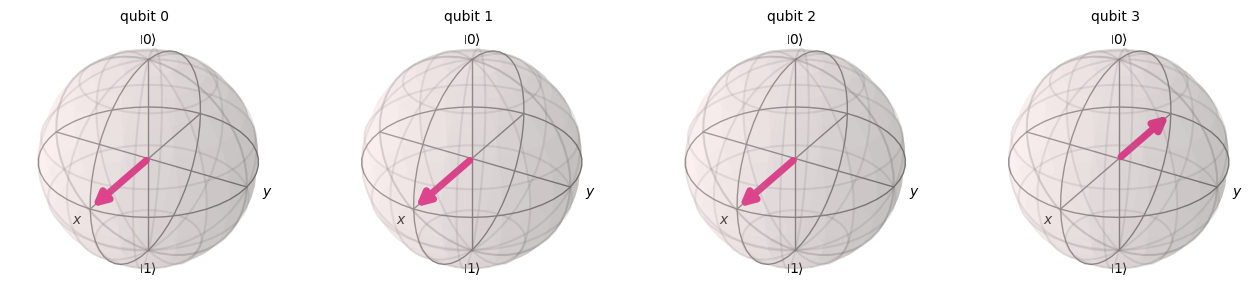

Funcion balanceada
Statevector:  Statevector([ 0.25-3.061617e-17j, -0.25+3.061617e-17j, -0.25+3.061617e-17j,
              0.25-3.061617e-17j, -0.25+3.061617e-17j,  0.25-3.061617e-17j,
              0.25-3.061617e-17j, -0.25+3.061617e-17j, -0.25+3.061617e-17j,
              0.25-3.061617e-17j,  0.25-3.061617e-17j, -0.25+3.061617e-17j,
              0.25-3.061617e-17j, -0.25+3.061617e-17j, -0.25+3.061617e-17j,
              0.25-3.061617e-17j],
            dims=(2, 2, 2, 2))


<IPython.core.display.Latex object>

{'0000': 0.06250000000000003,
 '0001': 0.06250000000000003,
 '0010': 0.06250000000000003,
 '0011': 0.06249999999999997,
 '0100': 0.06250000000000003,
 '0101': 0.06249999999999997,
 '0110': 0.06249999999999997,
 '0111': 0.06249999999999997,
 '1000': 0.06250000000000003,
 '1001': 0.0625,
 '1010': 0.0625,
 '1011': 0.0625,
 '1100': 0.0625,
 '1101': 0.0625,
 '1110': 0.0625,
 '1111': 0.06249999999999996}

array([-7.0167093e-15,  1.8000000e+02,  1.8000000e+02, -7.0167093e-15,
        1.8000000e+02, -7.0167093e-15, -7.0167093e-15,  1.8000000e+02,
        1.8000000e+02, -7.0167093e-15, -7.0167093e-15,  1.8000000e+02,
       -7.0167093e-15,  1.8000000e+02,  1.8000000e+02, -7.0167093e-15])

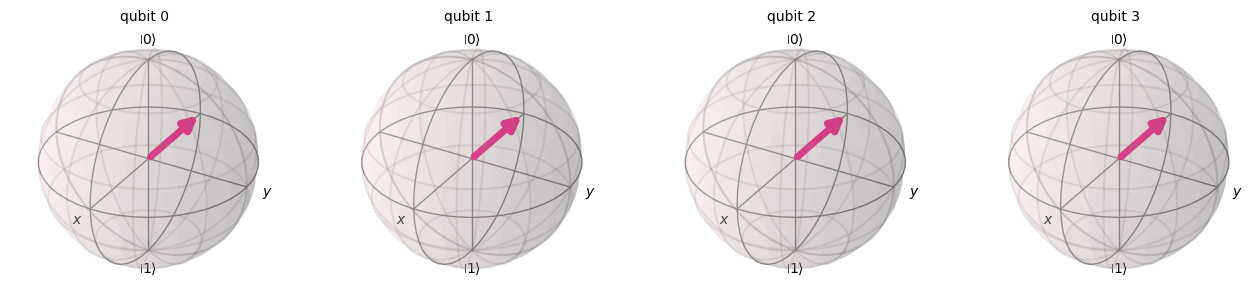

Statevector:  Statevector([-5.55111512e-17+2.08306057e-32j,
              3.92523115e-17+0.00000000e+00j,
              2.46519033e-32+1.23259516e-32j,
              1.11022302e-16+4.32978028e-17j,
              1.23259516e-32+1.40324503e-32j,
              1.17756934e-16+4.32978028e-17j,
              1.11022302e-16+4.32978028e-17j,
              7.07106781e-01-2.16489014e-16j,
             -4.16333634e-17+1.21148417e-32j,
             -3.92523115e-17-1.54074396e-32j,
              1.38777878e-17-1.84889275e-32j,
             -1.11022302e-16-4.32978028e-17j,
              1.38777878e-17-1.64727237e-32j,
             -1.17756934e-16-4.32978028e-17j,
             -9.71445147e-17-4.32978028e-17j,
             -7.07106781e-01+2.16489014e-16j],
            dims=(2, 2, 2, 2))


<IPython.core.display.Latex object>

{'0000': 3.0814879110195774e-33,
 '0001': 1.5407439555097894e-33,
 '0010': 7.59645419660784e-64,
 '0011': 1.4200651372405626e-32,
 '0100': 3.488387453707768e-64,
 '0101': 1.5741395327915415e-32,
 '0110': 1.4200651372405626e-32,
 '0111': 0.4999999999999999,
 '1000': 1.7333369499485123e-33,
 '1001': 1.5407439555097894e-33,
 '1010': 1.9259299443872341e-34,
 '1011': 1.4200651372405626e-32,
 '1100': 1.925929944387236e-34,
 '1101': 1.5741395327915415e-32,
 '1110': 1.1311756455824778e-32,
 '1111': 0.4999999999999999}

array([ 1.80000000e+02,  0.00000000e+00,  2.65650512e+01,  2.13053826e+01,
        4.87042801e+01,  2.01878656e+01,  2.13053826e+01, -1.75417732e-14,
        1.80000000e+02, -1.80000000e+02, -7.63333124e-14, -1.58694617e+02,
       -6.80092214e-14, -1.59812134e+02, -1.55977225e+02,  1.80000000e+02])

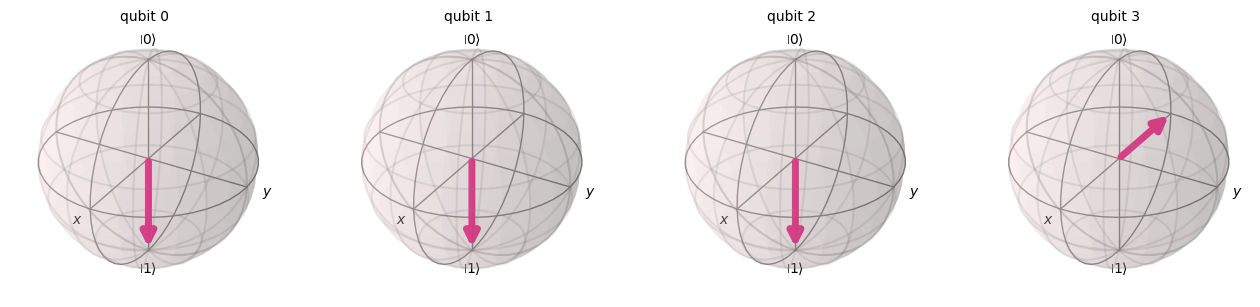

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


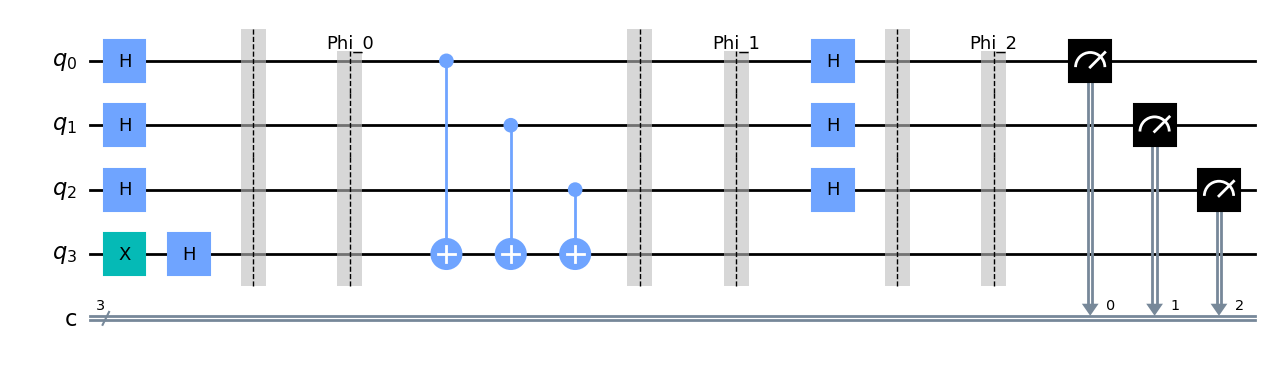

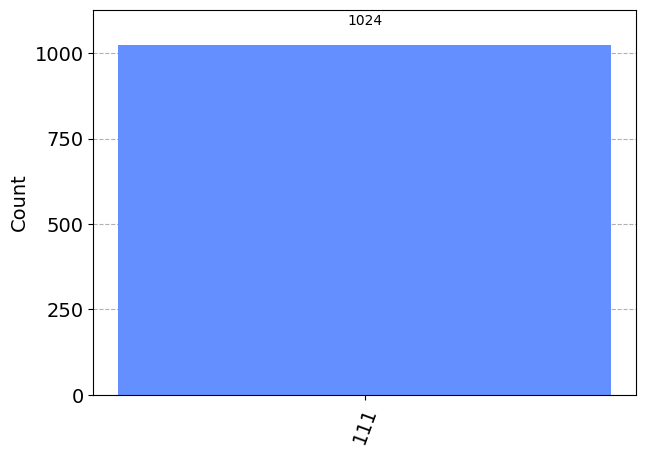

In [27]:
#Creamos un circuito de n qubits+1
n=3
circuit = QuantumCircuit(n+1,n)

#PASO 1 - ponemos los qubits de entrada en superposicion
circuit.h(range(n))

#ponemos el qubit de salida
circuit.x(n)
circuit.h(n)
circuit.barrier()

#descomentar para mostrar el circuito y vector de estados en este paso
#display(circuit.draw("mpl"))
svector_viz(circuit,0)

# PASO 2- Le añadimos el oráculo con funcion aleatoria
circuit = circuit.compose(dj_oracle(n))
circuit.barrier()

svector_viz(circuit,1)

#PASO 3 - Le añadimos las puertas Hadamard
circuit.h(range(n))
circuit.barrier()

svector_viz(circuit,2)

#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada
circuit.measure(range(n),range(n))

display(circuit.draw("mpl"))

#PASO 5- Medimos resultados finales
backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=circuit,backend=backend)
job = backend.run(transpiled_circ).result()

#mostramos histograma resultado
display(plot_histogram(job.get_counts()))



# Ejecucion en un Simulador con ruido

### EJERCICIO

Ejecuta en un simulador con ruido el circuito con el algoritmo de Detsch-Joza, para ello:

- Creamos el circuito cuántico, que llamamos <b>dj_circuit </b>
- Preparamos un simulador con el ruido de un dispositivo real, el `ibmq_vigo`.
- Transpilamos el circuito y lo ejecutamos en el simulador

Funcion balanceada


/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


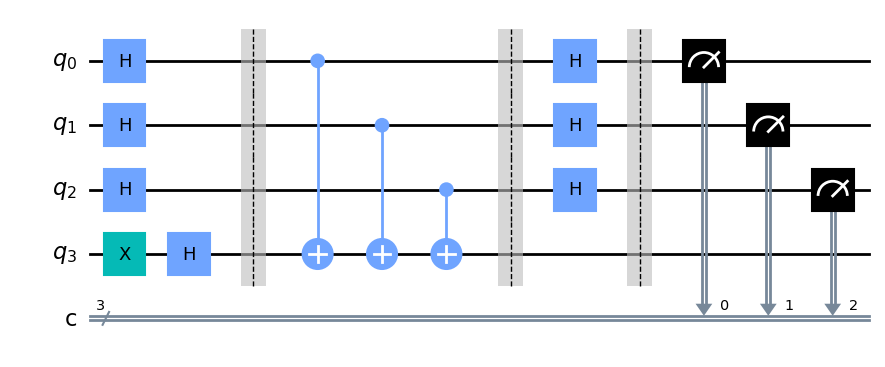

In [29]:
#Creamos un circuito de n qubits+1
n=3
dj_circuit = QuantumCircuit(n+1,n)

#PASO 1 - ponemos los qubits de entrada en superposicion
dj_circuit.h(range(n))

#ponemos el qubit de salida
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.barrier()

# PASO 2- Le añadimos el oráculo con funcion aleatoria
dj_circuit = dj_circuit.compose(dj_oracle(n))
dj_circuit.barrier()

#PASO 3 - Le añadimos las puertas Hadamard
dj_circuit.h(range(n))
dj_circuit.barrier()

#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada
dj_circuit.measure(range(n),range(n))

#Mostramos el circuito
display(dj_circuit.draw("mpl"))


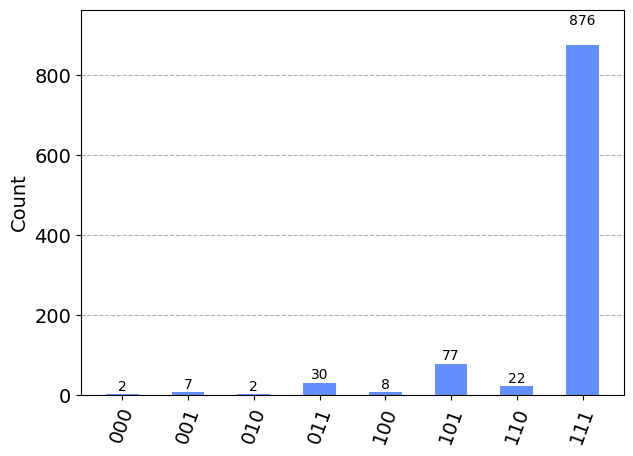

In [33]:
from qiskit.providers.fake_provider import FakeVigo

# Tomamos un backend ruidoso ficticio de fake providers
device_backend = FakeVigo()

# creamos el simulador
sim_vigo = AerSimulator.from_backend(device_backend)

# Transpilamos el circuito para mapearlo a las puertas ruidosas
transpiled_circuit = transpile(circuits=dj_circuit,backend=device_backend)

# Ejecutamos el circuito y obtenemos el resultado
result = sim_vigo.run(transpiled_circuit).result()
plot_histogram(result.get_counts())

# Ejecucion en un BackEnd cuántico real

### EJERCICIO

Ejecuta en un backend real cuantico el circuito con el algoritmo de Detsch-Joza, para ello:

- Creamos el circuito cuántico, que llamamos <b>dj_circuit </b>
- Lo ejecutamos primero en el simulador para ver si funciona bien antes de enviarlo a un BackEnd cuántico real
- Buscamos el backend que este menos cargado de trabajos
- Transpilamos el circuito y lo enviamos para ejecucion

In [ ]:
#Construimos el circuito
#Creamos un circuito de n qubits+1
n=3
dj_circuit = QuantumCircuit(n+1,n)

#PASO 1 - ponemos los qubits de entrada en superposicion
dj_circuit.h(range(n))

#ponemos el qubit de salida
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.barrier()

# PASO 2- Le añadimos el oráculo con funcion aleatoria
dj_circuit = dj_circuit.compose(dj_oracle(n))
dj_circuit.barrier()

#PASO 3 - Le añadimos las puertas Hadamard
dj_circuit.h(range(n))
dj_circuit.barrier()

#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada
dj_circuit.measure(range(n),range(n))

#ejecutamos en simulador para comprobar que esta ok
backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=dj_circuit,backend=backend)
job = backend.run(transpiled_circ).result()

#mostramos histograma resultado
display(plot_histogram(job.get_counts()))

In [ ]:
# buscamos el backend menos ocupado - using a real qc backend: lest busy
provider = IBMQ.load_account()
backend = least_busy(provider.backends(
                simulator=False))
backend

In [ ]:
#lanzamos la ejecucion del job
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw("mpl",idle_wires=False, fold=-1) #sin idle wires y todo en una linea

Y cuando termine la ejecucion, consultaremos el resultado